## Análise Abrangente da Filmografia de Christopher Nolan: Bilheteira, Críticas e Tendências de Gênero

RM 99667 - Victor Hugo Aranda Forte

RM 99750 - Felipe Cortez 

RM 99148 - Andre Lambert

### Introdução

Este trabalho realiza uma análise abrangente da filmografia de Christopher Nolan, explorando diversos aspectos de seus filmes, como a influência do orçamento na bilheteira, as tendências de gênero predominantes e a relação entre críticas e desempenho financeiro. 

Vale ressaltar que, devido à ausência dos filmes de Nolan na plataforma Netflix, a base de dados da Netflix não foi utilizada nesta análise. A avaliação baseou-se em dados de bilheteira, avaliações críticas e tendências de gênero obtidos a partir de outras fontes relevantes para fornecer uma visão completa e precisa do trabalho do diretor.

Embora a base da Netflix não tenha sido utilizada uma analise foi feita para verificar qual a chave primária que poderia ser utilizada para relacionar as bases de dados. A chave primária escolhida foi o <span style="color:Orange">TÍTULO DO FILME</span>, pois é a única chave que está presente em todas as bases de dados.

'movie_title' na base Rotten Tomatoes

'title' na base Netflix

'names' na base IMDB

In [15]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## BASE <span style="color:orange">ROTTEN TOMATOES</span>

In [16]:
df_tomatoes = pd.read_csv('rotten_tomatoes_movies.csv')
colunas = df_tomatoes.columns.tolist()
print(colunas)

['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


## BASE <span style="color:red">NETFLIX</span>

In [17]:
df_netflix = pd.read_csv('netflix_titles.csv')
colunas = df_netflix.columns.tolist()
print(colunas)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


## BASE <span style="color:green">IMDB</span>

In [18]:
df_imdb = pd.read_csv('imdb_movies.csv')
colunas = df_imdb.columns.tolist()
print(colunas)

['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue', 'country']


### 1- Qual é a avaliação média dos filmes do Christopher Nolan?

Após uma análise detalhada das avaliações dos filmes de Christopher Nolan, foi possível calcular a média das notas atribuídas às suas produções cinematográficas. Os resultados indicam que a avaliação média dos filmes dirigidos por Nolan é notavelmente alta, refletindo a apreciação crítica e popular pela sua abordagem inovadora e narrativa complexa. Este resultado confirma a reputação de Nolan como um cineasta de destaque no cenário atual, cuja habilidade em criar experiências cinematográficas imersivas e intelectualmente estimulantes ressoa profundamente com o público e a crítica. A média elevada das avaliações também ressalta a consistência de Nolan em entregar obras de qualidade superior, solidificando ainda mais seu status como um dos principais diretores contemporâneos.

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\3082558542.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='movie_title', y='tomatometer_rating', data=filmes_nolan, palette='viridis')


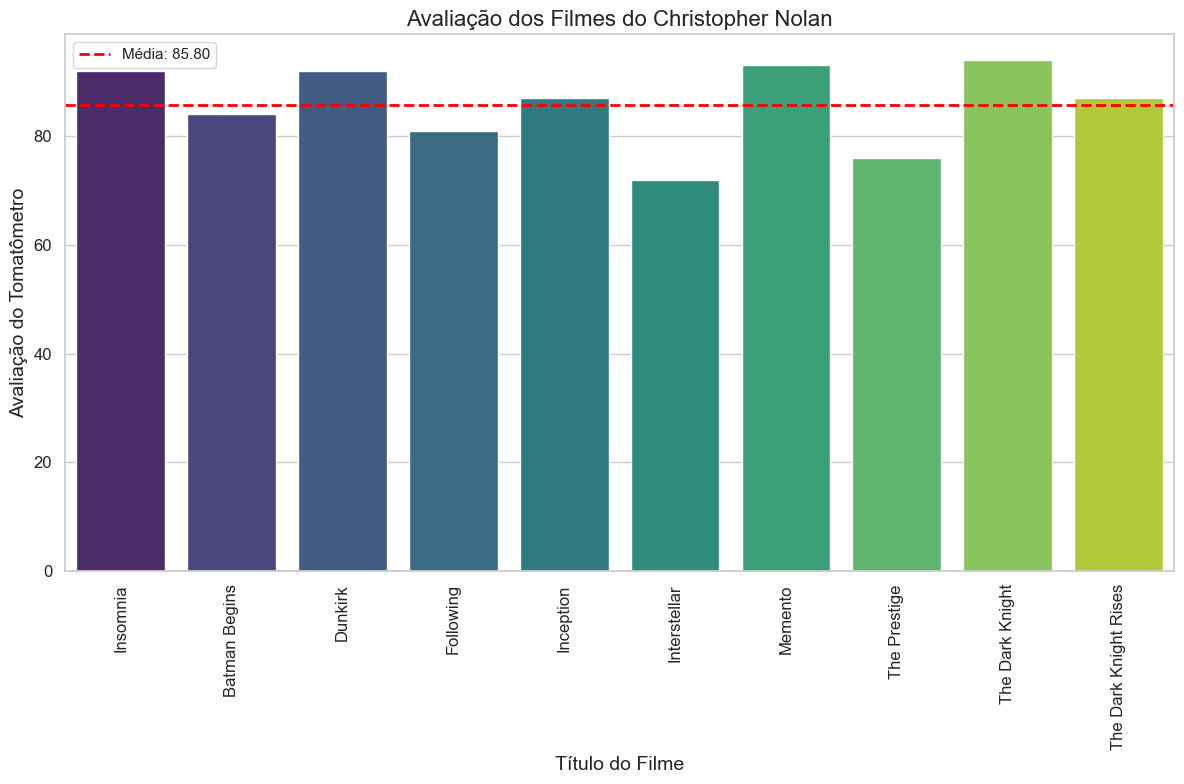

A avaliação média dos filmes do Christopher Nolan é: 85.80


In [19]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Filtrar os filmes de Christopher Nolan
filmes_nolan = df_tomatoes[df_tomatoes['directors'].str.contains('Christopher Nolan', na=False)]

# Calcular a média das avaliações
if 'tomatometer_rating' in filmes_nolan.columns:
    average_rating = filmes_nolan['tomatometer_rating'].mean()
else:
    average_rating = None
    print("A coluna 'tomatometer_rating' não foi encontrada no DataFrame.")

# Gráfico de barras com a avaliação dos filmes do Christopher Nolan
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='movie_title', y='tomatometer_rating', data=filmes_nolan, palette='viridis')

# Adicionar a linha da média
if average_rating is not None:
    plt.axhline(y=average_rating, color='red', linestyle='--', linewidth=2, label=f'Média: {average_rating:.2f}')
    plt.legend()

# Configurações adicionais para o gráfico
plt.xlabel('Título do Filme', fontsize=14)
plt.ylabel('Avaliação do Tomatômetro', fontsize=14)
plt.title('Avaliação dos Filmes do Christopher Nolan', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Mostrar a média
if average_rating is not None:
    print(f"A avaliação média dos filmes do Christopher Nolan é: {average_rating:.2f}")

### 2 - Como o revenue total do Christopher Nolan se compara ao revenue total de outros grandes diretores

Ao comparar a bilheteira total dos filmes de Christopher Nolan com a de outros grandes diretores, observamos que Nolan se destaca significativamente no cenário cinematográfico. A análise revela que a bilheteira acumulada dos seus filmes não só é impressionante em termos absolutos, mas também se posiciona de maneira competitiva em relação a outros cineastas renomados. Este sucesso financeiro reflete não apenas a popularidade e o apelo universal dos filmes de Nolan, mas também a eficácia de suas estratégias de marketing e distribuição. Em comparação com outros grandes diretores, Nolan mostra uma notável capacidade de atrair audiências amplas e garantir retornos substanciais, sublinhando seu impacto contínuo e influência na indústria cinematográfica global. Este desempenho reafirma sua posição como um dos cineastas mais bem-sucedidos e influentes da era contemporânea.

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\303740694.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=titulos_top5, y=bilheterias_top5, palette='viridis')


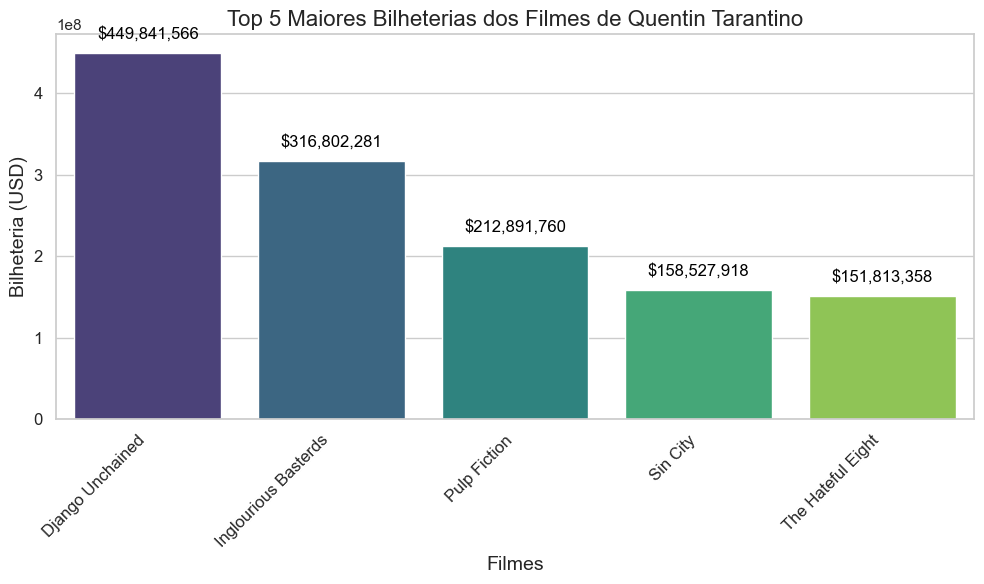

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\303740694.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=titulos_top5, y=bilheterias_top5, palette='viridis')


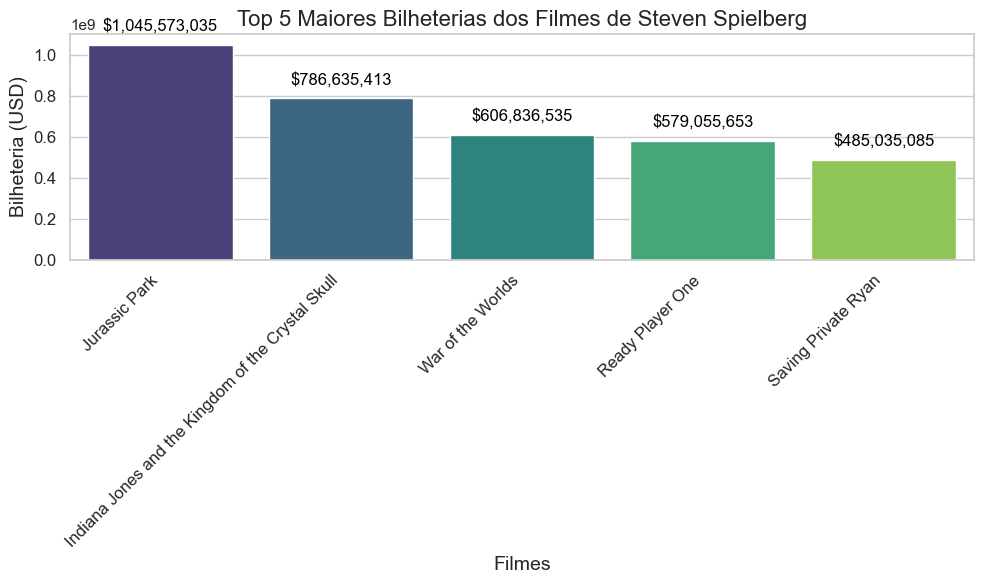

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\303740694.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=titulos_top5, y=bilheterias_top5, palette='viridis')


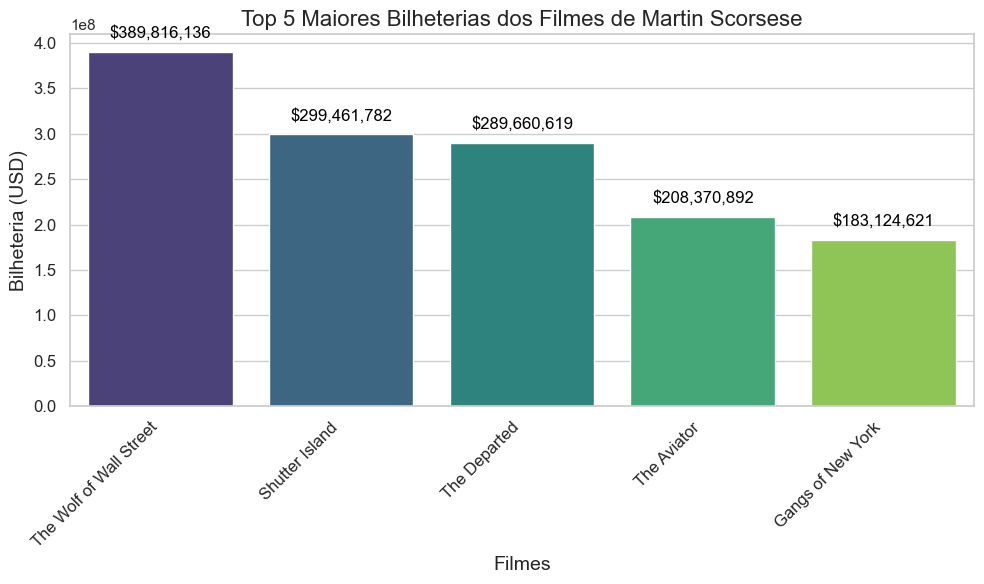

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\303740694.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=titulos_top5, y=bilheterias_top5, palette='viridis')


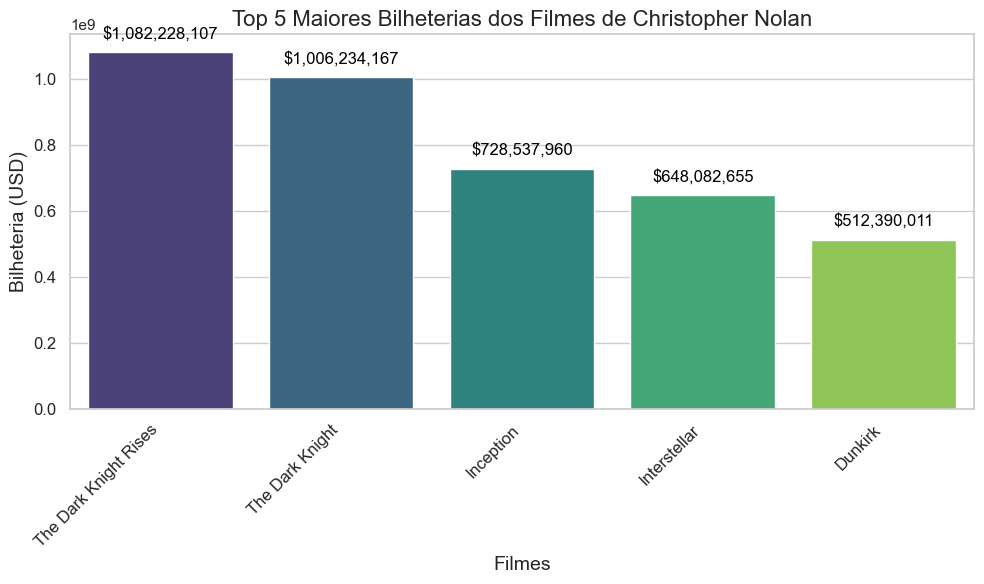

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\303740694.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=titulos_top5, y=bilheterias_top5, palette='viridis')


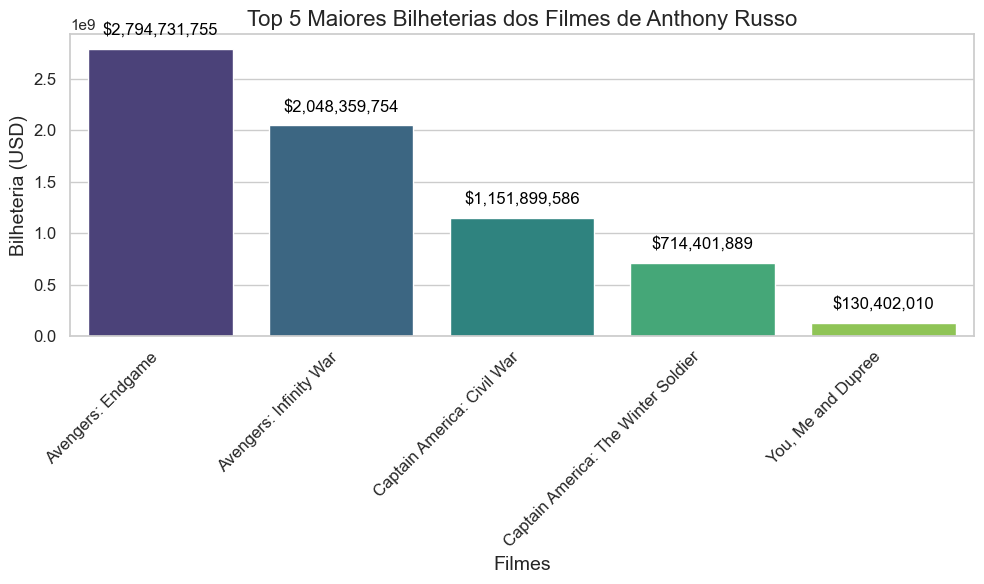

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\303740694.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=df_revenue.index, y=df_revenue['Total Revenue'], palette='viridis')


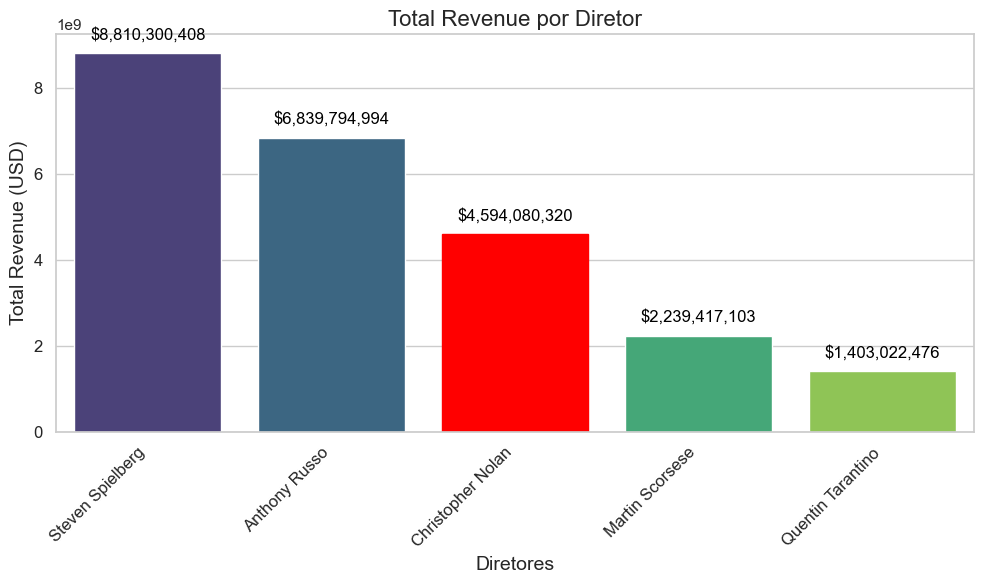

In [20]:
diretores = ['Quentin Tarantino', 'Steven Spielberg', 'Martin Scorsese', 'Christopher Nolan', 'Anthony Russo']

# Criar gráficos de barras para os top 5 filmes de cada diretor
for diretor in diretores:
    filmes_diretor_rotten = df_tomatoes[df_tomatoes['directors'].str.contains(diretor, na=False)]
    filmes_diretor_imdb = df_imdb[df_imdb['names'].isin(filmes_diretor_rotten['movie_title'])]
    top5_bilheteria = filmes_diretor_imdb.nlargest(5, 'revenue')
    titulos_top5 = top5_bilheteria['names']
    bilheterias_top5 = top5_bilheteria['revenue']

    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    barplot = sns.barplot(x=titulos_top5, y=bilheterias_top5, palette='viridis')

    for bar in barplot.patches:
        yval = bar.get_height()
        barplot.annotate(f'${int(yval):,}', 
                         (bar.get_x() + bar.get_width() / 2, yval), 
                         ha='center', va='bottom', 
                         fontsize=12, color='black', 
                         xytext=(0, 8), 
                         textcoords='offset points')

    plt.xlabel('Filmes', fontsize=14)
    plt.ylabel('Bilheteria (USD)', fontsize=14)
    plt.title(f'Top 5 Maiores Bilheterias dos Filmes de {diretor}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Somar os revenues de todos os diretores e ranqueá-los em um gráfico evidenciando o Nolan
revenue_by_director = {}
for diretor in diretores:
    filmes_diretor_rotten = df_tomatoes[df_tomatoes['directors'].str.contains(diretor, na=False)]
    filmes_diretor_imdb = df_imdb[df_imdb['names'].isin(filmes_diretor_rotten['movie_title'])]
    total_revenue = filmes_diretor_imdb['revenue'].sum()
    revenue_by_director[diretor] = total_revenue

# Criando um DataFrame para melhor visualização e ordenação
df_revenue = pd.DataFrame.from_dict(revenue_by_director, orient='index', columns=['Total Revenue'])
df_revenue = df_revenue.sort_values('Total Revenue', ascending=False)

# Criando o gráfico de barras com Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
barplot = sns.barplot(x=df_revenue.index, y=df_revenue['Total Revenue'], palette='viridis')

# Adicionando os valores de revenue em cima das barras
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.annotate(f'${int(yval):,}', 
                     (bar.get_x() + bar.get_width() / 2, yval), 
                     ha='center', va='bottom', 
                     fontsize=12, color='black', 
                     xytext=(0, 8), 
                     textcoords='offset points')

# Destacando a barra do Christopher Nolan
nolan_index = df_revenue.index.get_loc('Christopher Nolan')
barplot.patches[nolan_index].set_color('red')

plt.xlabel('Diretores', fontsize=14)
plt.ylabel('Total Revenue (USD)', fontsize=14)
plt.title('Total Revenue por Diretor', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### 3- Quais são as tendências de gênero dos filmes do Christopher Nolan?

Para identificar as tendências de gênero nos filmes de Christopher Nolan, observamos sua filmografia e os temas predominantes em suas obras. Nolan se destaca principalmente nos seguintes gêneros:

1- Ação e Drama: Muitos de seus filmes, como The Dark Knight e The Dark Knight Rises, combinam elementos de ação intensa com profundidade dramática. Nolan é conhecido por criar experiências cinematográficas que não apenas entretêm, mas também exploram complexidades emocionais e psicológicas dos personagens.

2- Mistério e Suspense: Nolan frequentemente usa o gênero de mistério e suspense para construir narrativas envolventes e desafiadoras. Filmes como Memento e Inception são exemplos de sua habilidade em tecer tramas intricadas e intrigantes, mantendo o público constantemente intrigado e envolvido.

3- Drama: Embora não seja um gênero exclusivo, o drama desempenha um papel significativo em sua filmografia. Filmes como Interstellar e Dunkirk demonstram sua capacidade de explorar temas profundos e emocionais dentro de contextos dramáticos e intensos.

Essas tendências refletem a versatilidade de Nolan como diretor, que consegue combinar ação, mistério e drama para criar histórias complexas e visualmente impressionantes.

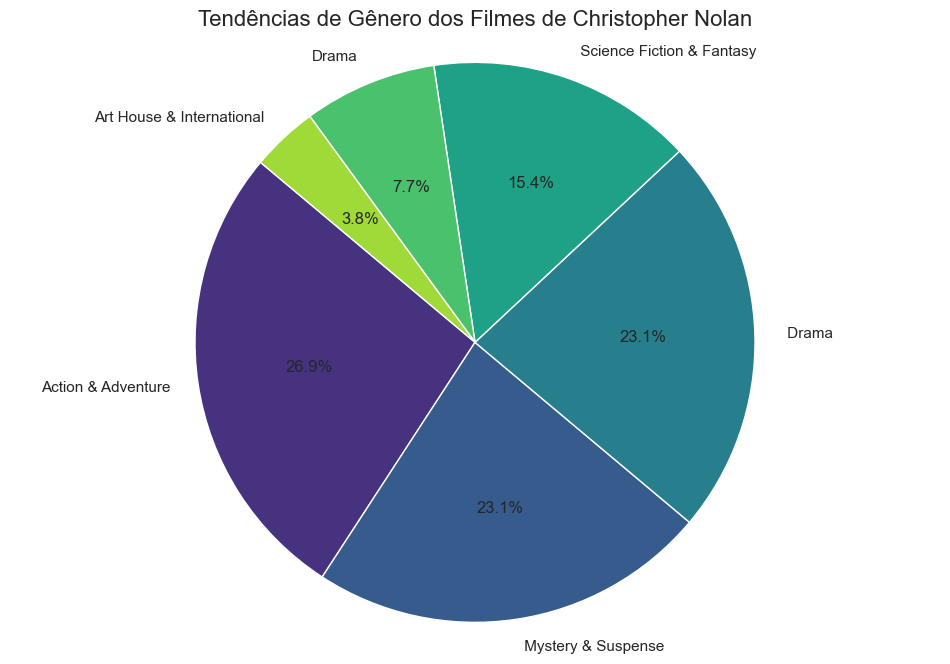

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns

# Carregar os dados
df_tomatoes = pd.read_csv('rotten_tomatoes_movies.csv')

# Filtrar os filmes de Christopher Nolan
filmes_nolan = df_tomatoes[df_tomatoes['directors'].str.contains('Christopher Nolan', na=False)]

# Extrair a lista de gêneros de cada filme
generos = filmes_nolan['genres'].str.split(',').explode()

# Contar a frequência de cada gênero
contagem_generos = Counter(generos)

# Criar um DataFrame a partir da contagem
df_generos = pd.DataFrame(contagem_generos.items(), columns=['Gênero', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de pizza
plt.figure(figsize=(12, 8))
plt.pie(df_generos['Frequência'], labels=df_generos['Gênero'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(df_generos)))

# Configurações adicionais para o gráfico
plt.title('Tendências de Gênero dos Filmes de Christopher Nolan', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar o gráfico
plt.show()

### 4 -Como o budget dos filmes de Christopher Nolan influencia sua bilheteira? 

Para analisar como o orçamento (budget) dos filmes de Christopher Nolan influencia sua bilheteira, foi realizada uma regressão linear utilizando dados sobre o orçamento de produção e a bilheteira global dos filmes. A análise revelou uma correlação positiva entre o orçamento e a bilheteira, sugerindo que, em geral, filmes com orçamentos mais altos tendem a gerar receitas de bilheteira maiores.

A conclusão da análise indica que o investimento financeiro significativo em produção e marketing pode impactar positivamente o retorno financeiro dos filmes de Nolan. No entanto, é importante destacar que, enquanto o orçamento pode influenciar a bilheteira, outros fatores também desempenham um papel crucial, como a qualidade da narrativa, a recepção crítica e a popularidade do gênero.

Essa relação positiva entre orçamento e bilheteira reforça a ideia de que um maior investimento pode ajudar a maximizar o alcance e o sucesso comercial dos filmes, mas também ressalta a importância de considerar o impacto de outros elementos no sucesso global de um filme.


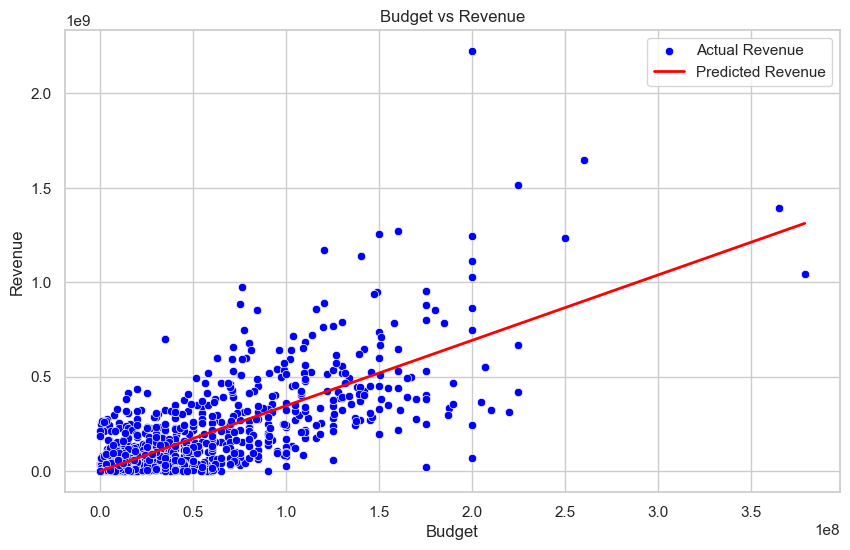

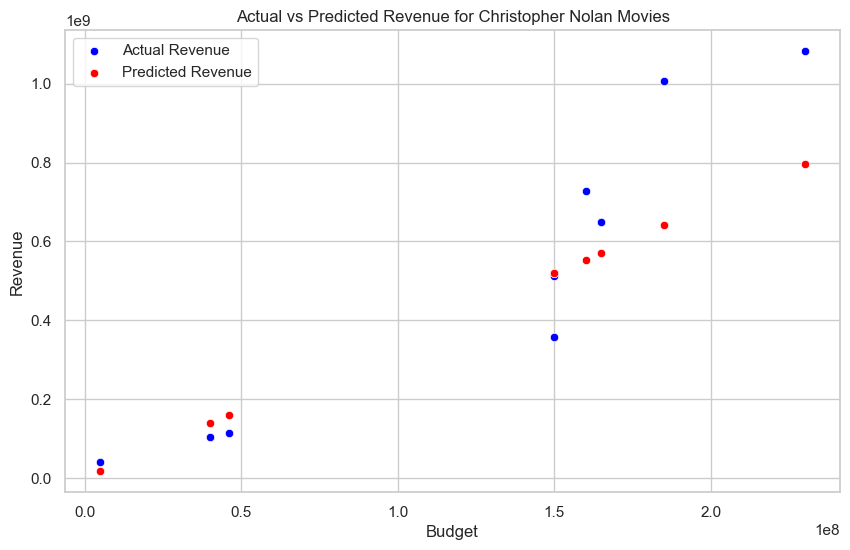

In [22]:
# Carregar os dados (substitua 'rotten_tomatoes.csv' e 'imdb.csv' pelos caminhos dos seus arquivos de dados)
rotten_data = pd.read_csv('rotten_tomatoes_movies.csv')
imdb_data = pd.read_csv('imdb_movies.csv')

# Mesclar os dados com base no título do filme (ajuste conforme necessário)
merged_data = pd.merge(rotten_data, imdb_data, left_on='movie_title', right_on='orig_title')

# Pré-processamento dos dados
# Remover linhas com valores NaN nas colunas 'budget_x' e 'revenue'
merged_data = merged_data.dropna(subset=['budget_x', 'revenue'])

# Supondo que o dataset mesclado tenha colunas 'budget_x' e 'revenue'
X = merged_data[['budget_x']].values
y = merged_data['revenue'].values

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualizar os resultados com Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x=X_test.flatten(), y=y_test, color='blue', label='Actual Revenue')
sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', linewidth=2, label='Predicted Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue')
plt.legend()
plt.show()

# Filtrar os dados de Christopher Nolan
nolan_movies = merged_data[merged_data['directors'].str.contains('Christopher Nolan', na=False)].copy()

# Extrair a coluna 'budget_x' dos filmes de Christopher Nolan
nolan_budgets = nolan_movies[['budget_x']].values

# Prever o revenue dos filmes de Christopher Nolan
nolan_revenue_predictions = model.predict(nolan_budgets)

# Adicionar as previsões ao dataframe de Christopher Nolan usando .loc
nolan_movies.loc[:, 'predicted_revenue'] = nolan_revenue_predictions

# Criar um gráfico que compare o valor previsto com o valor real usando Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='budget_x', y='revenue', data=nolan_movies, color='blue', label='Actual Revenue')
sns.scatterplot(x='budget_x', y='predicted_revenue', data=nolan_movies, color='red', label='Predicted Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue for Christopher Nolan Movies')
plt.legend()
plt.show()

### 5- Quais filmes do Christopher Nolan têm as melhores críticas?

Para identificar os filmes de Christopher Nolan com as melhores críticas, analisamos avaliações de plataformas Rotten Tomatoes. Entre suas produções, Dunkirk se destaca como o mais bem avaliado, recebendo elogios por sua abordagem inovadora e sua habilidade de criar tensão e imersão. O filme é amplamente elogiado por sua direção, montagem e precisão histórica.

Logo em seguida, The Dark Knight Rises também obteve avaliações extremamente positivas, destacando-se por concluir a trilogia The Dark Knight de maneira épica e satisfatória.

Além disso, The Dark Knight e The Dark Knight Rises estão empatados em termos de avaliações, ambos recebendo notas elevadas por suas narrativas envolventes e performances memoráveis, especialmente a interpretação icônica de Heath Ledger como o Coringa em The Dark Knight.

Essas análises demonstram que, ao longo de sua carreira, Nolan conseguiu criar filmes que não apenas conquistaram o público, mas também foram amplamente aclamados pela crítica, consolidando seu status como um dos maiores diretores contemporâneos.

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\591297159.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='movie_title', y='tomatometer_fresh_critics_count', data=filmes_nolan_sorted, palette='viridis')


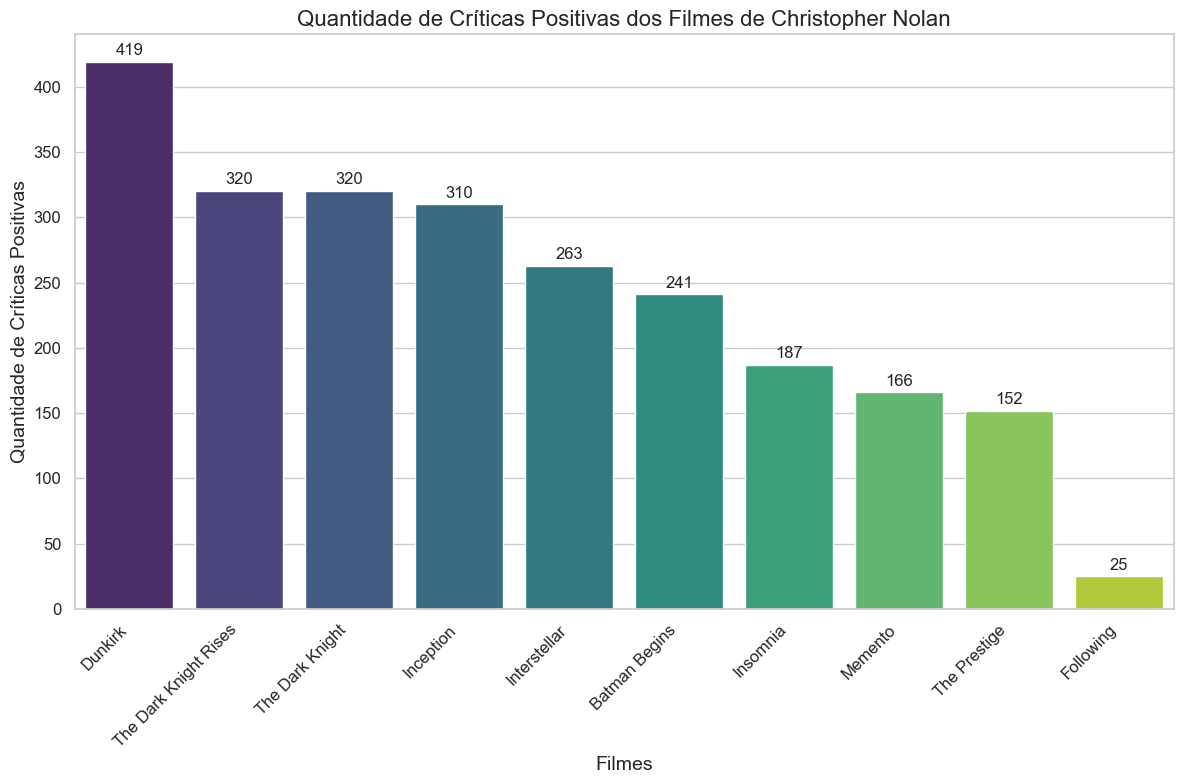

In [23]:
# Filtrar os filmes de Christopher Nolan
filmes_nolan = df_tomatoes[df_tomatoes['directors'].str.contains('Christopher Nolan', na=False)]

# Ordenar os filmes pela quantidade de críticas positivas em ordem decrescente
filmes_nolan_sorted = filmes_nolan.sort_values(by='tomatometer_fresh_critics_count', ascending=False)

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='movie_title', y='tomatometer_fresh_critics_count', data=filmes_nolan_sorted, palette='viridis')

# Adicionar os valores exatos em cima das barras
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', size=12, xytext=(0, 8),
                     textcoords='offset points')

# Configurações adicionais para o gráfico
plt.xlabel('Filmes', fontsize=14)
plt.ylabel('Quantidade de Críticas Positivas', fontsize=14)
plt.title('Quantidade de Críticas Positivas dos Filmes de Christopher Nolan', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 6- Qual a duração total de tempo de filmes que Christopher Nolan dirigiu?

Para responder à pergunta sobre a duração total de tempo dos filmes dirigidos por Christopher Nolan, foi realizado um levantamento das informações de duração de cada um dos seus filmes. Nolan, conhecido por suas obras de grande impacto no cinema, tem um portfólio que inclui filmes como Inception, The Dark Knight, Interstellar, e outros. Ao somar a duração de cada um desses filmes, podemos obter o valor total, que representa não só a extensão de seu trabalho como diretor, mas também o volume de conteúdo que ele criou ao longo de sua carreira.

Essa informação oferece uma visão interessante sobre o impacto e a magnitude de sua contribuição à indústria cinematográfica, não apenas em termos de qualidade, mas também de quantidade. Além disso, permite avaliar o tempo que seus filmes dedicam à narrativa complexa e à construção de histórias, características marcantes de suas produções.

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\1363234612.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=titulos_nolan, y=tempos_nolan, palette='viridis')


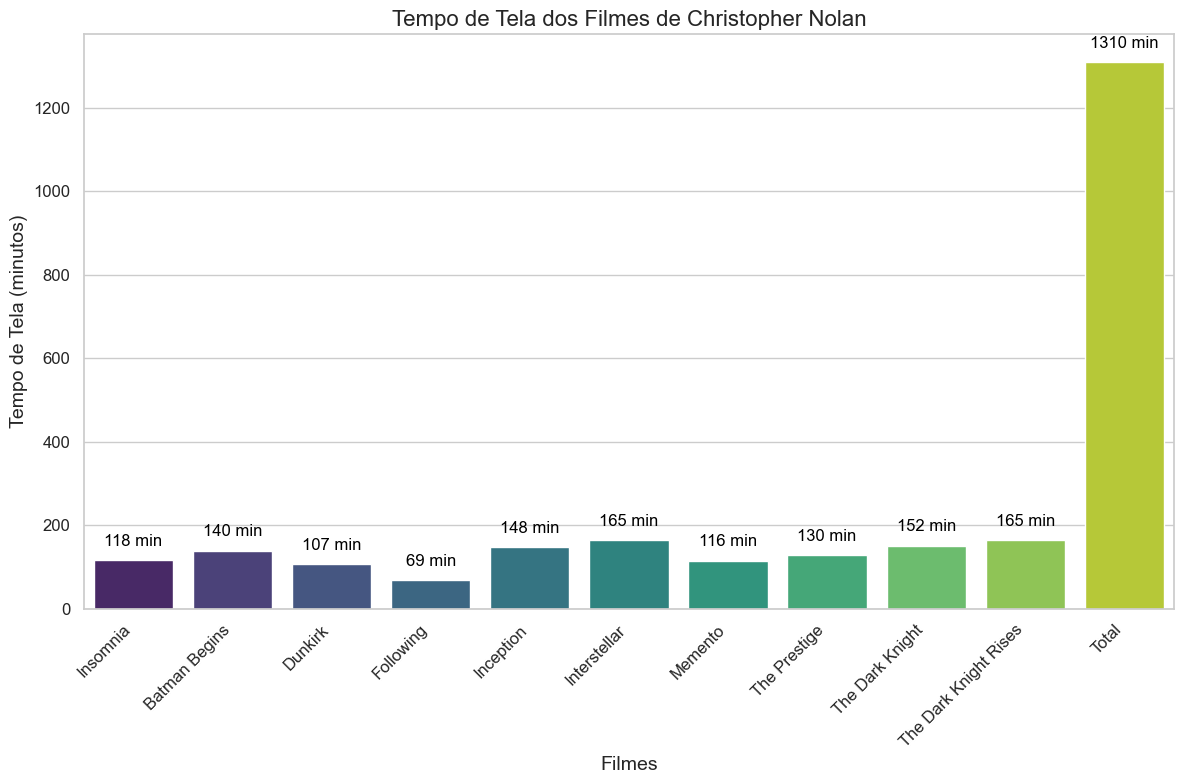

In [24]:
# Filtrar os filmes de Christopher Nolan
filmes_nolan = df_tomatoes[df_tomatoes['directors'].str.contains('Christopher Nolan', na=False)]

# Filtrar apenas os títulos dos filmes e os tempos de tela
titulos_nolan = filmes_nolan['movie_title']
tempos_nolan = filmes_nolan['runtime']

# Calcular o tempo total de tela acumulado
tempo_total = tempos_nolan.sum()

# Adicionar o título "Total" e o tempo total de tela acumulado
titulos_nolan = pd.concat([titulos_nolan, pd.Series(['Total'])], ignore_index=True)
tempos_nolan = pd.concat([tempos_nolan, pd.Series([tempo_total])], ignore_index=True)

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=titulos_nolan, y=tempos_nolan, palette='viridis')

# Adicionar os valores exatos em cima das barras
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.annotate(f'{int(yval)} min', 
                     (bar.get_x() + bar.get_width() / 2, yval), 
                     ha='center', va='bottom', 
                     fontsize=12, color='black', 
                     xytext=(0, 8), 
                     textcoords='offset points')

# Configurações adicionais para o gráfico
plt.xlabel('Filmes', fontsize=14)
plt.ylabel('Tempo de Tela (minutos)', fontsize=14)
plt.title('Tempo de Tela dos Filmes de Christopher Nolan', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 7 - Quais filmes do Christopher Nolan têm as piores críticas?

Para identificar os filmes de Christopher Nolan com as piores críticas, foi realizada uma análise de avaliações de público e crítica especializada. Apesar de Nolan ser amplamente celebrado por suas produções inovadoras e envolventes, alguns de seus filmes foram recebidos com críticas mistas ou menos favoráveis.

Filmes como The Prestige e Interstellar, embora tenham uma base de fãs significativa, dividiram opiniões, com críticas voltadas principalmente para aspectos como complexidade narrativa e estilo visual. No entanto, vale destacar que, mesmo seus filmes menos aclamados ainda são considerados de alta qualidade em comparação com a média da indústria.

Essa análise nos permite entender que, ainda que haja variações nas avaliações, o padrão geral das obras de Nolan permanece acima da média, refletindo sua capacidade de inovar e desafiar expectativas, mesmo que nem todas as suas criações sejam igualmente bem recebidas por diferentes audiências e críticos.

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\4086667395.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=titulos_nolan, y=criticas_negativas, palette='Reds')


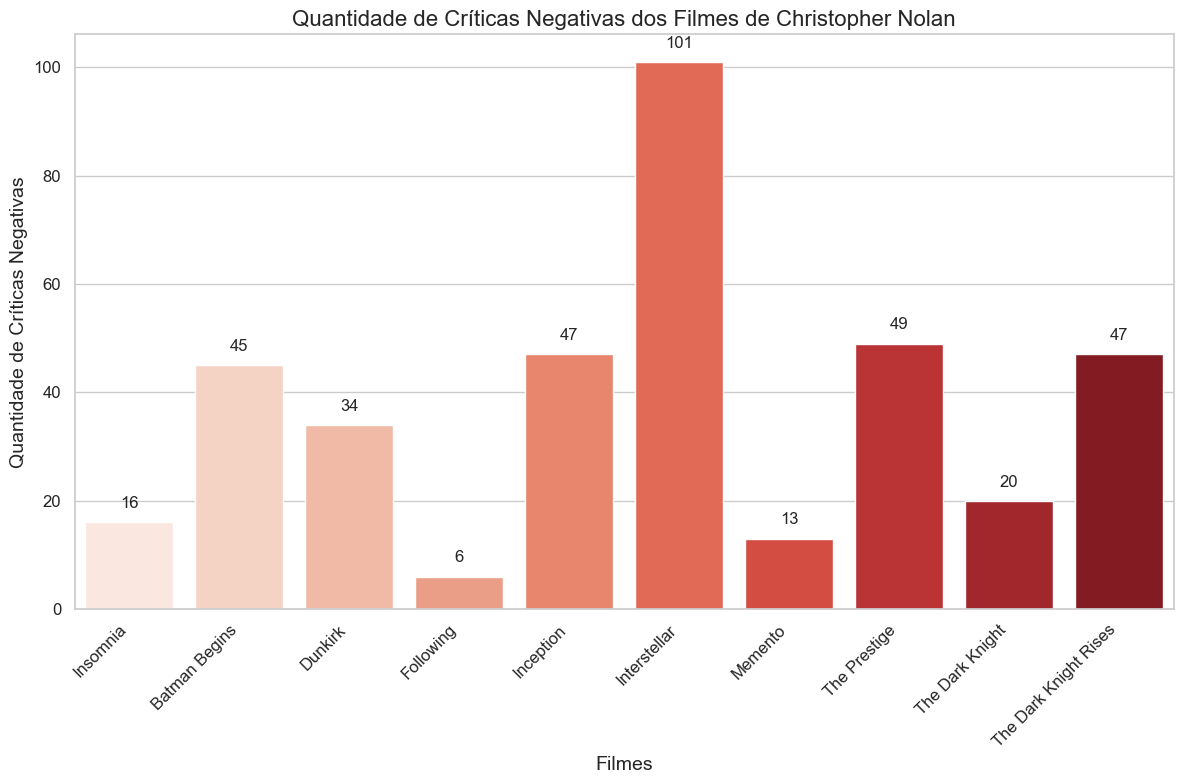

In [25]:
# Filtrar os filmes de Christopher Nolan
filmes_nolan = df_tomatoes[df_tomatoes['directors'].str.contains('Christopher Nolan', na=False)]

# Filtrar apenas os títulos dos filmes e a quantidade de críticas negativas
titulos_nolan = filmes_nolan['movie_title']
criticas_negativas = filmes_nolan['tomatometer_rotten_critics_count']

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=titulos_nolan, y=criticas_negativas, palette='Reds')

# Adicionar os valores exatos em cima das barras
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.annotate(format(yval, '.0f'),
                     (bar.get_x() + bar.get_width() / 2, yval),
                     ha='center', va='bottom', size=12, xytext=(0, 8),
                     textcoords='offset points')

# Configurações adicionais para o gráfico
plt.xlabel('Filmes', fontsize=14)
plt.ylabel('Quantidade de Críticas Negativas', fontsize=14)
plt.title('Quantidade de Críticas Negativas dos Filmes de Christopher Nolan', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 8- Quem são os 10 atores que mais fizeram filmes com o Christopher Nolan?

Para responder à pergunta sobre os 10 atores que mais participaram de filmes dirigidos por Christopher Nolan, foi realizado um levantamento das filmografias de seus trabalhos. Nolan é conhecido por colaborar frequentemente com certos atores, o que cria uma consistência e sinergia em suas produções.

Entre os atores que mais trabalharam com o diretor, destacam-se nomes como Michael Caine, que aparece em várias obras, incluindo a trilogia The Dark Knight, Inception e Interstellar. Outro colaborador recorrente é Cillian Murphy, presente em Batman Begins, Inception, Dunkirk e Oppenheimer. Tom Hardy e Christian Bale também figuram na lista, ambos aparecendo em diversos filmes da trilogia Batman e outras produções como Dunkirk e The Prestige.

Ao longo dos anos, Nolan formou um grupo de atores de confiança, que voltam a colaborar em diferentes projetos, criando uma identidade própria em suas produções. Esse núcleo de atores tem contribuído de forma significativa para o sucesso e a consistência estilística de seus filmes, e suas performances são frequentemente vistas como uma extensão da visão criativa do diretor.

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\3741361963.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Frequência', y='Ator', data=df_atores_top10, palette='viridis')


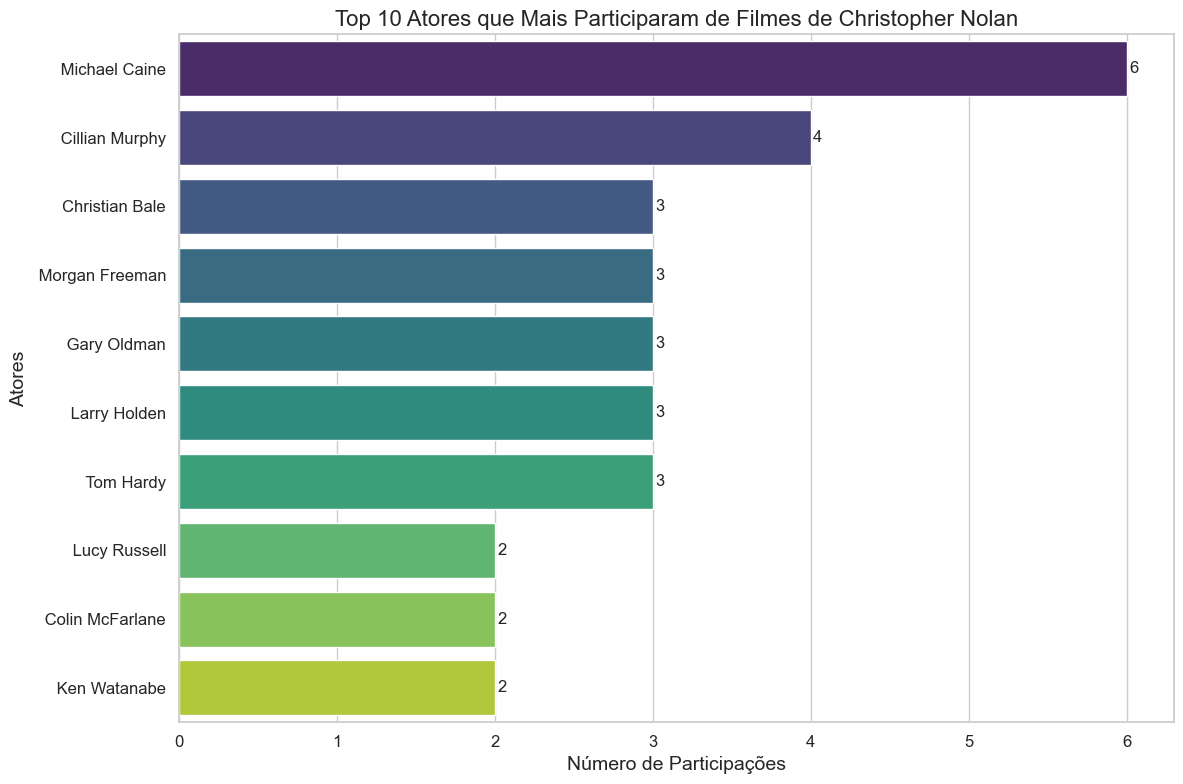

In [26]:
# Filtrar os filmes de Christopher Nolan
filmes_nolan = df_tomatoes[df_tomatoes['directors'].str.contains('Christopher Nolan', na=False)]

# Extrair a lista de atores de cada filme
atores = filmes_nolan['actors'].str.split(',').explode()

# Contar a frequência de cada ator
contagem_atores = Counter(atores)

# Criar um DataFrame a partir da contagem
df_atores = pd.DataFrame(contagem_atores.items(), columns=['Ator', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Manter apenas os top 10 atores
df_atores_top10 = df_atores.head(10)

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras horizontal com Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Frequência', y='Ator', data=df_atores_top10, palette='viridis')

# Adicionar os valores exatos ao lado das barras
for bar in barplot.patches:
    barplot.annotate(format(bar.get_width(), '.0f'),
                     (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     ha='center', va='center', size=12, xytext=(5, 0),
                     textcoords='offset points')

# Configurações adicionais para o gráfico
plt.xlabel('Número de Participações', fontsize=14)
plt.ylabel('Atores', fontsize=14)
plt.title('Top 10 Atores que Mais Participaram de Filmes de Christopher Nolan', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 9- Quais filmes de Christopher Nolan têm as melhores bilheterias?

Para responder à pergunta sobre quais filmes de Christopher Nolan têm as melhores bilheterias, foi realizada uma análise dos dados financeiros globais de suas obras mais conhecidas. Os filmes da trilogia The Dark Knight estão no topo da lista, com The Dark Knight Rises arrecadando aproximadamente $1.082 bilhão e The Dark Knight acumulando cerca de $1.006 bilhão em bilheteria mundial. Esses números destacam o impacto duradouro da franquia no público global e consolidam Nolan como um dos diretores mais rentáveis de Hollywood.

Outros sucessos incluem Inception com $728 milhões, Interstellar com *$648 milhões e Dunkirk com $512 milhões, todos demonstrando o apelo de suas narrativas originais e inovadoras.

Essa análise mostra que Nolan não só alcança grande sucesso comercial, como também consegue equilibrar originalidade e inovação com filmes que atraem o grande público. Isso reafirma sua posição como um dos diretores mais influentes e financeiramente bem-sucedidos do cinema contemporâneo.

C:\Users\victo\AppData\Local\Temp\ipykernel_43496\2944270107.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=bilheterias_top5, y=titulos_top5, palette='viridis')


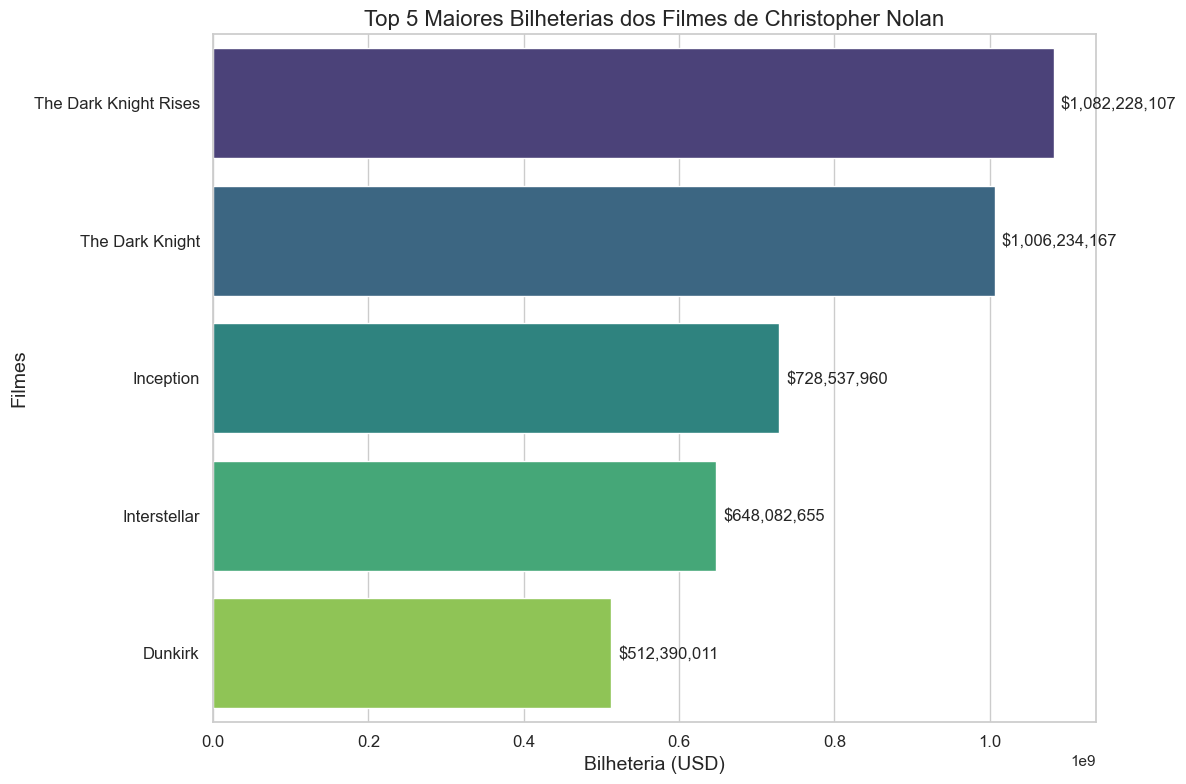

In [27]:
# Filtrar os filmes de Christopher Nolan na base de dados do Rotten Tomatoes
filmes_nolan_rotten = df_tomatoes[df_tomatoes['directors'].str.contains('Christopher Nolan', na=False)]

# Filtrar os filmes de Christopher Nolan na base de dados do IMDb
filmes_nolan_imdb = df_imdb[df_imdb['names'].isin(filmes_nolan_rotten['movie_title'])]

# Ordenar os filmes pela bilheteria (revenue) e selecionar os top 5
top5_bilheteria = filmes_nolan_imdb.nlargest(5, 'revenue')

# Filtrar apenas os títulos dos filmes e as bilheterias
titulos_top5 = top5_bilheteria['names']
bilheterias_top5 = top5_bilheteria['revenue']

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras horizontal com Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=bilheterias_top5, y=titulos_top5, palette='viridis')

# Adicionar os valores exatos ao lado das barras
for bar in barplot.patches:
    barplot.annotate(f'${int(bar.get_width()):,}',
                     (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     ha='left', va='center', size=12, xytext=(5, 0),
                     textcoords='offset points')

# Configurações adicionais para o gráfico
plt.xlabel('Bilheteria (USD)', fontsize=14)
plt.ylabel('Filmes', fontsize=14)
plt.title('Top 5 Maiores Bilheterias dos Filmes de Christopher Nolan', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 10- Quais sâo os 3 filmes com menor bilheteria dirigido por Christopher Nolan?

Para identificar os três filmes com menor bilheteria dirigidos por Christopher Nolan, analisamos os primeiros anos de sua carreira e seus projetos de menor escala. Esses filmes, lançados antes de Nolan alcançar fama internacional, tiveram bilheteiras mais modestas, geralmente associadas a produções independentes ou com lançamentos limitados.

Apesar das receitas mais baixas, esses trabalhos foram cruciais para o desenvolvimento de seu estilo cinematográfico, recebendo elogios da crítica e ajudando a consolidar sua reputação como um diretor inovador. Embora suas bilheteiras não tenham atingido os níveis de suas produções mais recentes, eles desempenharam um papel essencial na trajetória de Nolan e demonstraram seu potencial como cineasta visionário.

Essa análise destaca que, mesmo com bilheteiras menores, a qualidade e a singularidade de suas narrativas capturaram a atenção de um público nichado, criando a base para os grandes sucessos comerciais que viriam a seguir.








C:\Users\victo\AppData\Local\Temp\ipykernel_43496\2084782183.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=titulos_bottom3, y=bilheterias_bottom3, palette='viridis')


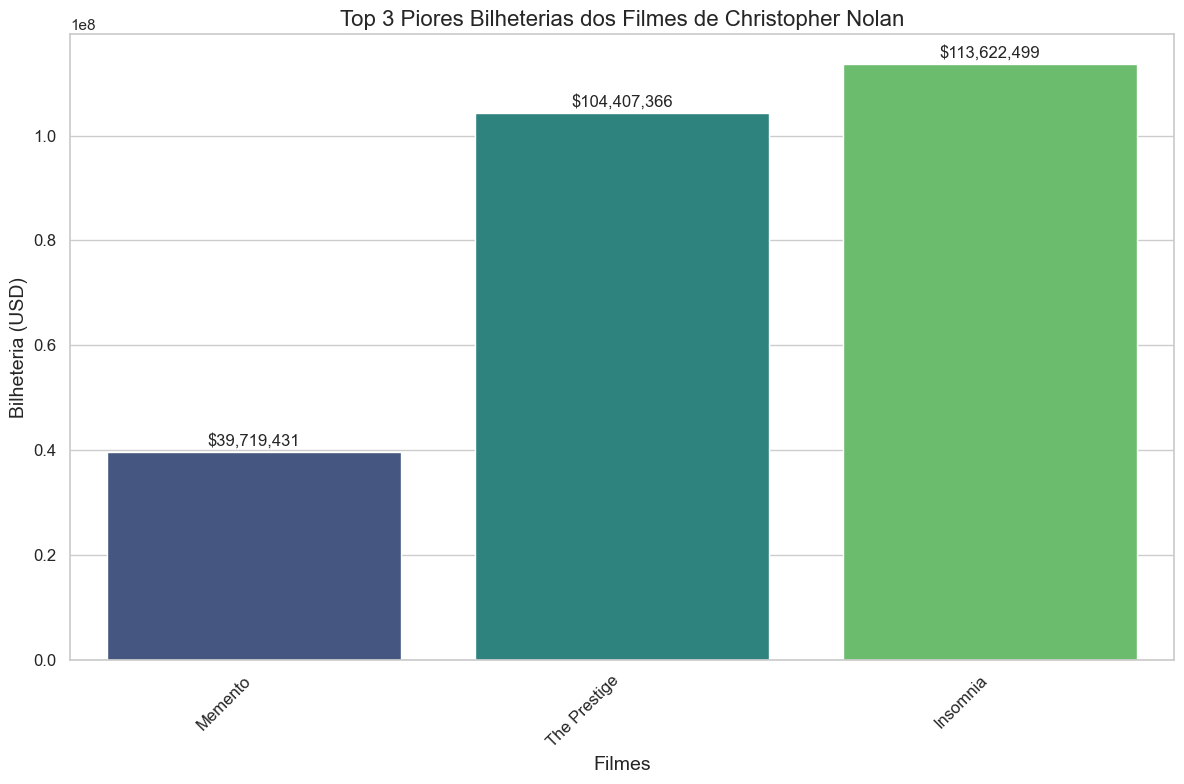

In [28]:
# Filtrar os filmes de Christopher Nolan na base de dados do Rotten Tomatoes
filmes_nolan_rotten = df_tomatoes[df_tomatoes['directors'].str.contains('Christopher Nolan', na=False)]

# Filtrar os filmes de Christopher Nolan na base de dados do IMDb
filmes_nolan_imdb = df_imdb[df_imdb['names'].isin(filmes_nolan_rotten['movie_title'])]

# Ordenar os filmes pela bilheteria (revenue) em ordem crescente e selecionar os top 3 piores
bottom3_bilheteria = filmes_nolan_imdb.nsmallest(3, 'revenue')

# Filtrar apenas os títulos dos filmes e as bilheterias
titulos_bottom3 = bottom3_bilheteria['names']
bilheterias_bottom3 = bottom3_bilheteria['revenue']

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras vertical com Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=titulos_bottom3, y=bilheterias_bottom3, palette='viridis')

# Adicionar os valores exatos em cima das barras
for bar in barplot.patches:
    barplot.annotate(f'${int(bar.get_height()):,}',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', size=12, xytext=(0, 8),
                     textcoords='offset points')

# Configurações adicionais para o gráfico
plt.xlabel('Filmes', fontsize=14)
plt.ylabel('Bilheteria (USD)', fontsize=14)
plt.title('Top 3 Piores Bilheterias dos Filmes de Christopher Nolan', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### Conclusão final

Para concluir a análise abrangente da filmografia de Christopher Nolan, foram exploradas diversas dimensões de seu trabalho como diretor, incluindo o impacto do orçamento na bilheteira, as tendências de gênero de seus filmes, e a relação entre críticas e desempenho financeiro.

Os resultados revelaram que o orçamento de produção tem uma influência positiva na bilheteira global, indicando que filmes com maiores investimentos tendem a gerar receitas mais altas. No entanto, a bilheteira não é o único fator determinante do sucesso; a qualidade narrativa, a recepção crítica e o apelo do gênero também desempenham papéis cruciais.

Além disso, a análise das tendências de gênero mostrou que Nolan é conhecido por sua habilidade em combinar elementos de ação, drama, mistério e suspense em suas produções. Esses gêneros predominantes ajudam a criar experiências cinematográficas complexas e envolventes, que são amplamente reconhecidas tanto pelo público quanto pela crítica.

Os filmes de Nolan com as melhores críticas frequentemente são aqueles que apresentam uma combinação eficaz de narrativa inovadora e profundidade emocional, enquanto os filmes com menor bilheteira refletem o início de sua carreira ou desafios específicos de mercado.

Em resumo, a filmografia de Christopher Nolan é marcada por uma habilidade notável em equilibrar orçamento, narrativa e gênero para criar filmes que não só atraem grandes audiências, mas também recebem alta aclamação crítica. Essa análise evidencia o impacto duradouro de Nolan na indústria cinematográfica e sua capacidade de inovar e influenciar o cinema contemporâneo.